# Introduction
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

 - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

 - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

In [2]:
df = pd.read_csv('loan.csv', low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
pd.set_option('display.max_columns', 100)
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

<br>
<br>
<br>

# DATA CLEANING

In [5]:
#Checking for null percentage
pd.set_option('display.max_rows', 200)
display(round(df.isnull().sum().sort_values(ascending=False)/len(df.index) * 100,2))

total_il_high_credit_limit        100.00
mo_sin_old_rev_tl_op              100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt                      100.00
total_bc_limit                    100.00
dti_joint       

In [6]:
#Removing the following columns
# 1. > 90% null columns 
# 2. "desc" 
# 3. all columns which have all zero values
columnsToBeDropped =  df.isnull().sum().sort_values(ascending=False)[0:58].index.to_list()
loanDf = df.drop(columns=columnsToBeDropped)
loanDf = loanDf.drop(columns=["emp_title","title","chargeoff_within_12_mths","delinq_amnt","collections_12_mths_ex_med","tax_liens","acc_now_delinq"])

In [7]:
#converting datatype to string
loanDf["id"] = loanDf["id"].astype(str)
loanDf["member_id"] = loanDf["member_id"].astype(str)

#converting to int by removing the "months" suffix
loanDf["term"] = loanDf["term"].str.extract('(\d+)').astype(int)

loanDf["emp_length"] = loanDf["emp_length"].astype(str).str.extract('(\d+)')
loanDf["emp_length"] = pd.to_numeric(loanDf["emp_length"],errors="coerce")

# changing datatype to float
loanDf["int_rate"] = loanDf["int_rate"].astype(str).str.rstrip("%")
loanDf["int_rate"] = pd.to_numeric(loanDf["int_rate"],errors="coerce")

loanDf["revol_util"] = loanDf["revol_util"].astype(str).str.rstrip("%")
loanDf["revol_util"] = pd.to_numeric(loanDf["revol_util"],errors="coerce")

# changing datatype to date
loanDf["issue_d"] = pd.to_datetime(loanDf["issue_d"], format="%b-%y")
loanDf["last_pymnt_d"] = pd.to_datetime(loanDf["last_pymnt_d"], format="%b-%y")
loanDf["last_credit_pull_d"] = pd.to_datetime(loanDf["last_credit_pull_d"], format="%b-%y")
loanDf["earliest_cr_line"] = pd.to_datetime(loanDf["earliest_cr_line"], format="%b-%y")

In [8]:
#imputing missing values (mean is skewed) 
loanDf.loc[np.isnan(loanDf["emp_length"]),["emp_length"]] = loanDf["emp_length"].median()
loanDf.loc[np.isnan(loanDf["revol_util"]),["revol_util"]] = loanDf["revol_util"].median()
loanDf.loc[np.isnan(loanDf["pub_rec_bankruptcies"]),["pub_rec_bankruptcies"]] = loanDf["pub_rec_bankruptcies"].median()

In [9]:
#checking for missing values
display(round(loanDf.isnull().sum().sort_values(ascending=False)/len(loanDf.index) * 100,2))

last_pymnt_d               0.18
last_credit_pull_d         0.01
pub_rec_bankruptcies       0.00
emp_length                 0.00
zip_code                   0.00
purpose                    0.00
url                        0.00
pymnt_plan                 0.00
loan_status                0.00
issue_d                    0.00
verification_status        0.00
annual_inc                 0.00
home_ownership             0.00
sub_grade                  0.00
dti                        0.00
grade                      0.00
installment                0.00
int_rate                   0.00
term                       0.00
funded_amnt_inv            0.00
funded_amnt                0.00
loan_amnt                  0.00
member_id                  0.00
addr_state                 0.00
delinq_2yrs                0.00
application_type           0.00
total_pymnt                0.00
policy_code                0.00
last_pymnt_amnt            0.00
collection_recovery_fee    0.00
recoveries                 0.00
total_re

In [10]:
loanDf.dropna(subset=['last_pymnt_d', 'last_credit_pull_d'], inplace=True)

In [11]:
#checking for missing values
display(round(loanDf.isnull().sum().sort_values(ascending=False)/len(loanDf.index) * 100,2))

pub_rec_bankruptcies       0.0
home_ownership             0.0
addr_state                 0.0
zip_code                   0.0
purpose                    0.0
url                        0.0
pymnt_plan                 0.0
loan_status                0.0
issue_d                    0.0
verification_status        0.0
annual_inc                 0.0
emp_length                 0.0
application_type           0.0
sub_grade                  0.0
grade                      0.0
installment                0.0
int_rate                   0.0
term                       0.0
funded_amnt_inv            0.0
funded_amnt                0.0
loan_amnt                  0.0
member_id                  0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
policy_code                0.0
last_credit_pull_d         0.0
last_pymnt_amnt            0.0
last_pymnt_d               0.0
collection_recovery_fee    0.0
recoveries                 0.0
total_re

Now as all the missing values are either imputed or removed, we move to other data cleaning activities

___earliest_cr_line___: The month the borrower's earliest reported credit line was opened. Let's split the date column into earliest_cr_line_month and earliest_cr_line_year

In [12]:
loanDf["earliest_cr_line_month"] = loanDf["earliest_cr_line"].dt.month
loanDf["earliest_cr_line_year"] = loanDf["earliest_cr_line"].dt.year
len(loanDf[loanDf['earliest_cr_line_year'] > 2011 ])

90

We can see that 90 records of earliest credit line are years greater than 2011 while are 2011 is the max of the time period were loans are issued

In [14]:
#lets check the unique values of these years
loanDf.loc[loanDf['earliest_cr_line_year'] > 2011, 'earliest_cr_line_year'].unique()

array([2062, 2068, 2064, 2067, 2065, 2063, 2054, 2066, 2059, 2056, 2046,
       2050, 2061], dtype=int64)

As we can deduce, this might have happened because year stored in two digits might have been confused for the 21st century
while it was infact the 20th century

In [16]:
loanDf.loc[loanDf['earliest_cr_line_year'] > 2011, 'earliest_cr_line_year'] = loanDf.loc[loanDf['earliest_cr_line_year'] 
                                                                                         > 2011, 'earliest_cr_line_year'] -100

In [17]:
temp = loanDf.groupby('earliest_cr_line_year').agg(count=pd.NamedAgg('earliest_cr_line_year', aggfunc='count'))
temp

,count
earliest_cr_line_year,
1946,1
1950,1
1954,2
1956,1
1959,1
1961,2
1962,5
1963,10
1964,9


Now we have removed the anomalies in the 'earliest_cr_line_year' column. We can now proceed for analysis

<br>
<br>
<br>

# ANALYSIS

### Univariate Analysis

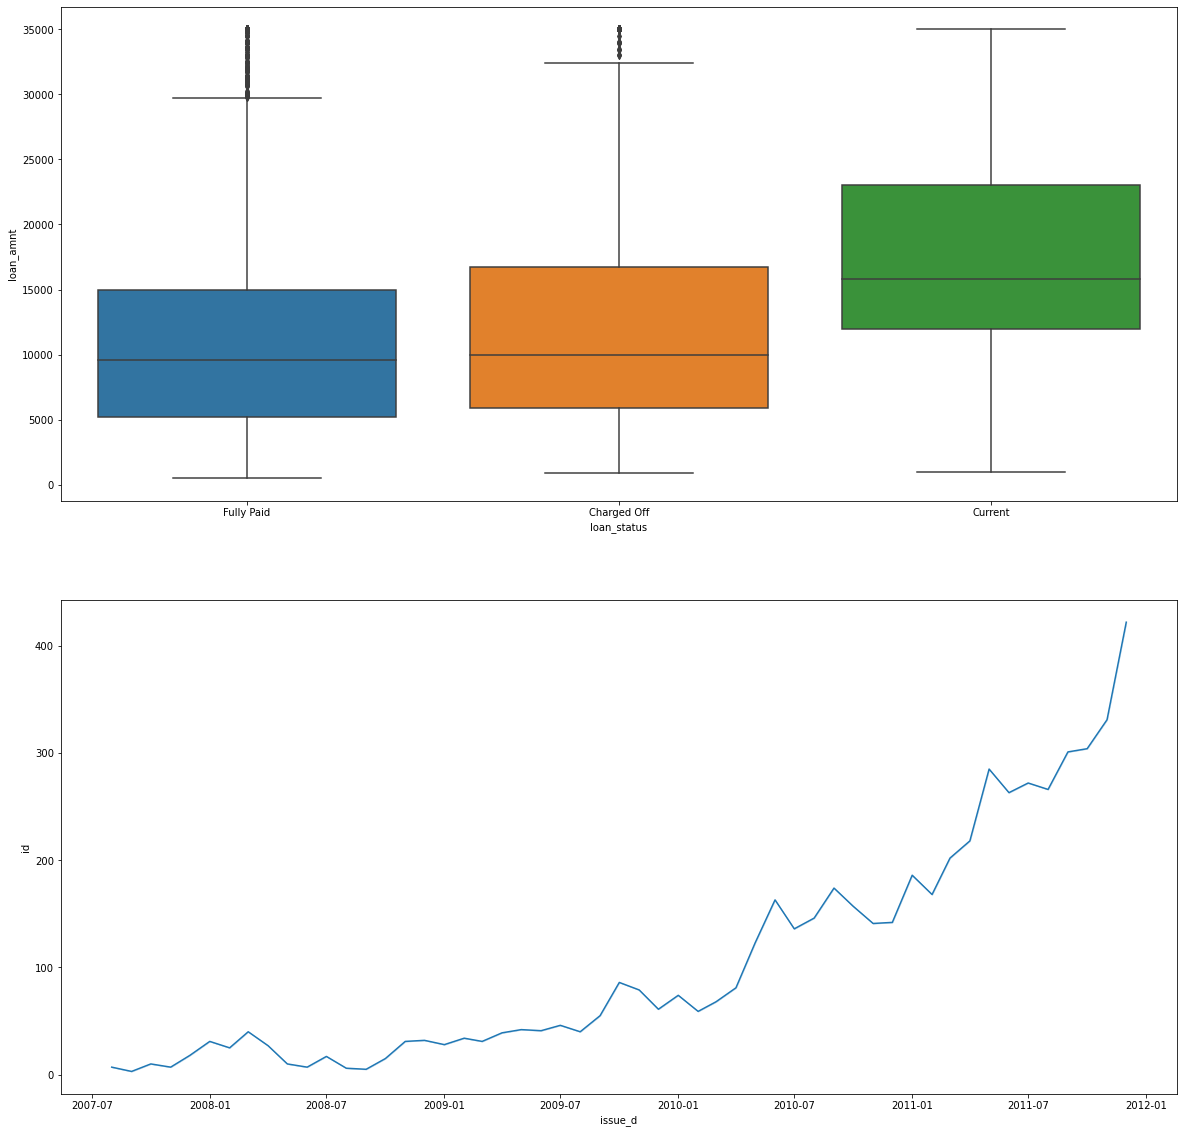

In [13]:
plt.figure(figsize=(20, 20))
defaulters = loanDf[loanDf["loan_status"] =="Charged Off"]
plt.subplot(2,1,1)
sns.boxplot(x="loan_status",y="loan_amnt",data=loanDf)
plt.subplot(2,1,2)
sns.lineplot(x="issue_d",y="id",data=defaulters,estimator=lambda x:len(x))



# defaulters increased exponentially 
# more likely to default for large loans
# Many outliers in fully paid

In [18]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

### 1) Loan Status

In [ ]:
plt.figure(figsize = (15,10))
ax = 